#**GATHERING DATA**

In [1]:
import pandas as pd   #Library for manipualtion and filtering the data.
import numpy as np  #Library for scientific computing.
import matplotlib.pyplot as plt  #Library for Data visualization.
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
#Importing Insurance Dataset using read_csv in pandas.
df = pd.read_csv("insurance_data.csv", index_col = [0])

In [3]:
#"head()" used to get first 5 rows of dataset.
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
index,,,,,,,,,,
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 115.2+ KB


In [5]:
df.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [6]:
df.shape

(1340, 10)

In [7]:
#Extracting out the values count in columns using loop and "value_counts()".
column_value_count = ["gender", "children", "smoker", "region", "diabetic"]
for i in df[column_value_count]:
  print(df[i].value_counts())
  print("\n---------------------------------\n")

male      678
female    662
Name: gender, dtype: int64

---------------------------------

0    576
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

---------------------------------

No     1066
Yes     274
Name: smoker, dtype: int64

---------------------------------

southeast    443
northwest    349
southwest    314
northeast    231
Name: region, dtype: int64

---------------------------------

No     698
Yes    642
Name: diabetic, dtype: int64

---------------------------------



#**DATA PRE-PROCESSING**

In [8]:
replace_num = {   'gender': {'male' : 0 , 'female' : 1} ,
                  'smoker': {'No': 0 , 'Yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3},
                    'diabetic': {'No' : 0, 'Yes' : 1}
               }
df.replace(replace_num, inplace = True)

In [9]:
#"describe()" used to give statistics for numerical parameteric column.
df.describe()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1337.000000,1340.000000
mean,670.500000,38.078652,0.494030,30.668955,94.157463,0.479104,1.093284,0.204478,1.540015,13252.745642
std,386.968991,11.102924,0.500151,6.106735,11.434712,0.499750,1.205334,0.403470,1.114047,12109.609288
min,1.000000,18.000000,0.000000,16.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1121.870000
25%,335.750000,29.000000,0.000000,26.275000,86.000000,0.000000,0.000000,0.000000,0.000000,4719.685000
50%,670.500000,38.000000,0.000000,30.400000,92.000000,0.000000,1.000000,0.000000,2.000000,9369.615000
75%,1005.250000,47.000000,1.000000,34.700000,99.000000,1.000000,2.000000,0.000000,2.000000,16604.305000
max,1340.000000,60.000000,1.000000,53.100000,140.000000,1.000000,5.000000,1.000000,3.000000,63770.430000


In [10]:
#"nunique()" used to distinct values in each column in dataset.
df.nunique()

PatientID        1340
age                43
gender              2
bmi               275
bloodpressure      61
diabetic            2
children            6
smoker              2
region              4
claim            1337
dtype: int64

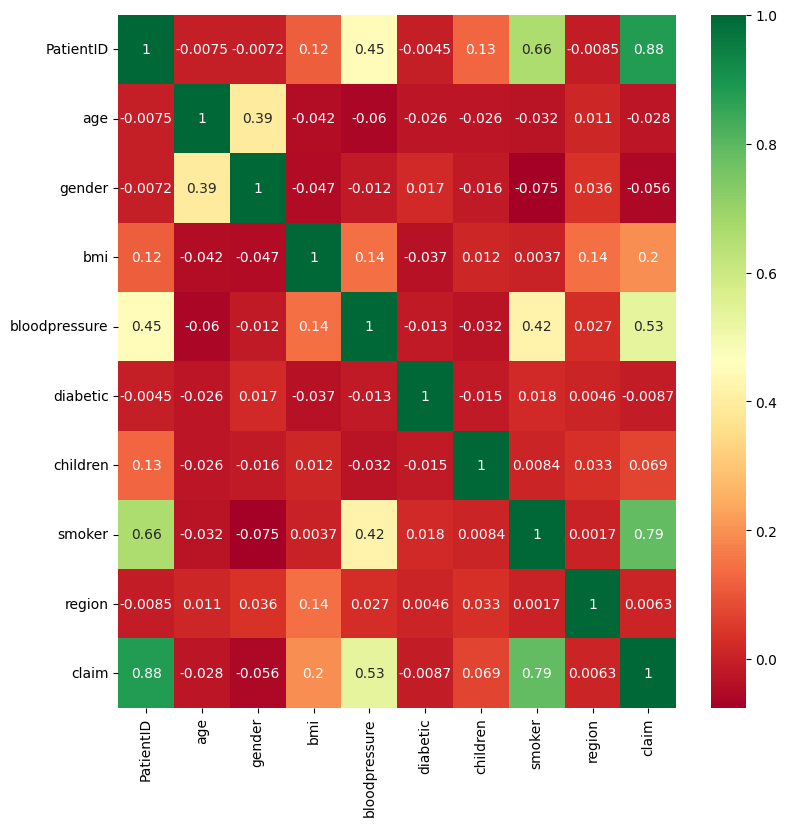

In [11]:
#Defining the correlation between the attributes.
corr_df = df.corr()
top_corr_fig = corr_df.index
plt.figure(figsize=(9,9))
sns.heatmap(df[top_corr_fig].corr(), annot=True, cmap ="RdYlGn")
plt.show()

#**FEATURE ENGINEERING**

#####Column : BMI

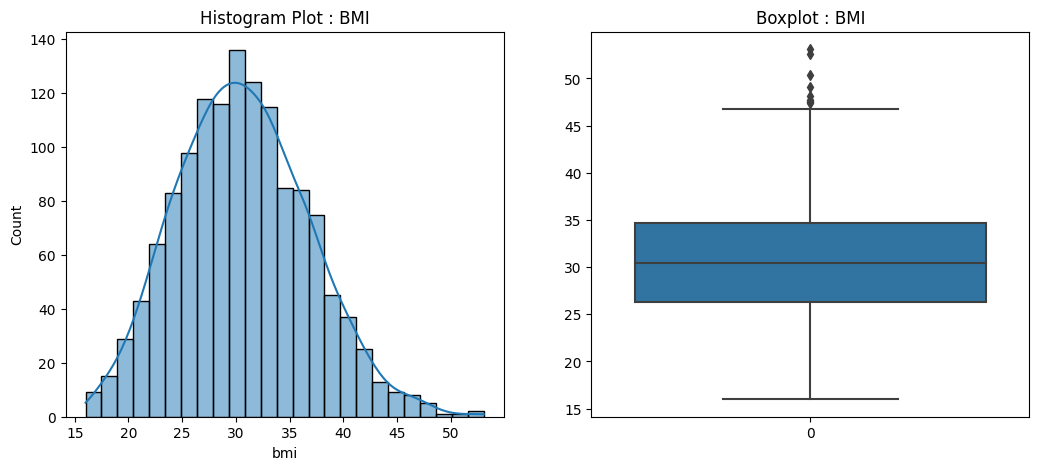


Before Removing Outliers :  0.28597245020808587 



In [12]:
plt.figure(figsize=(26,5))
plt.subplot(1,4,1)
sns.histplot((df["bmi"]), kde = True)
plt.title("Histogram Plot : BMI")

plt.subplot(1,4,2)
sns.boxplot(df["bmi"])
plt.title("Boxplot : BMI")
plt.show()

print("\nBefore Removing Outliers : ", df["bmi"].skew(),"\n")

Total rows removed : 9 

After Removing Outliers :  0.1617930296259756 



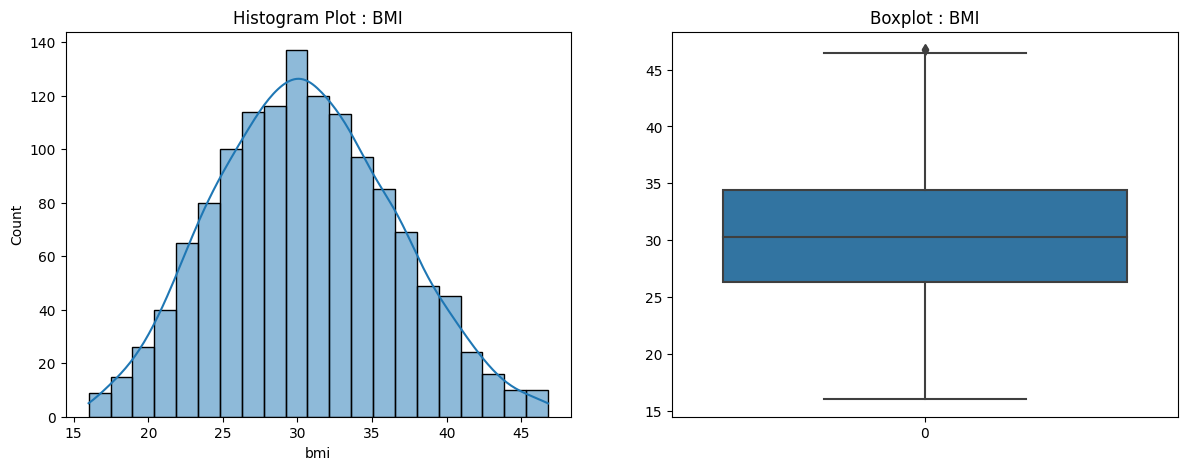

In [13]:
q3 = df["bmi"].quantile(0.75)
q1 = df["bmi"].quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

#Replacing outliers with NAN value.
outier = 0
for i in df["bmi"]:
  if i > upper:
    outier+=1
    df["bmi"].replace(i,np.nan, inplace = True)
print("Total rows removed :",outier,"\n")

#As the data is skewed, we will replace NAN value with Median value.
from sklearn.impute import SimpleImputer 
bmi = SimpleImputer(strategy='median') 
bmi_reshape = np.array(df["bmi"]).reshape(-1, 1)
df["bmi"] = bmi.fit_transform(bmi_reshape)

print("After Removing Outliers : ", df["bmi"].skew(),"\n")


plt.figure(figsize=(30,5))
plt.subplot(1,4,1)
sns.histplot((df["bmi"]), kde = True)
plt.title("Histogram Plot : BMI")

plt.subplot(1,4,2)
sns.boxplot(df["bmi"])
plt.title("Boxplot : BMI")
plt.show()

#####Column : Age

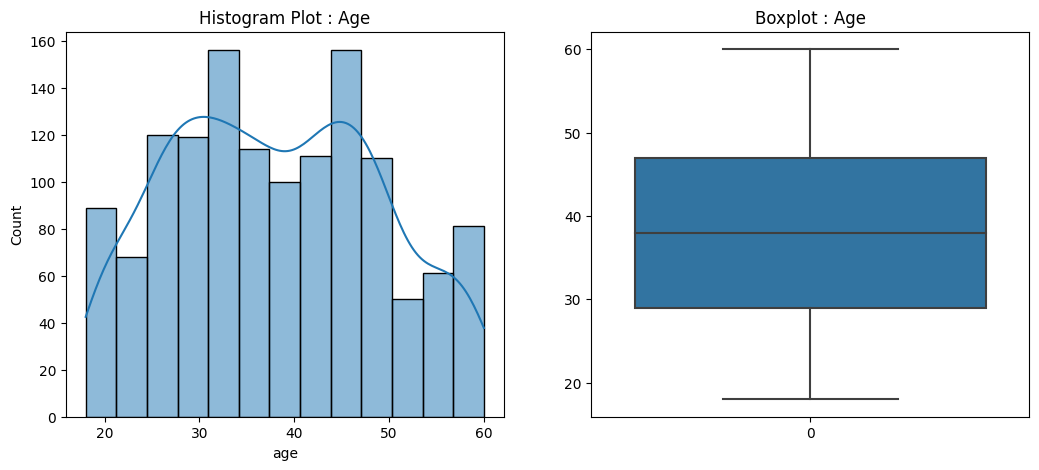


Before Removing Outliers :  0.11361133741072633 



In [14]:
plt.figure(figsize=(26,5))
plt.subplot(1,4,1)
sns.histplot((df["age"]), kde = True)
plt.title("Histogram Plot : Age")

plt.subplot(1,4,2)
sns.boxplot(df["age"])
plt.title("Boxplot : Age")
plt.show()

print("\nBefore Removing Outliers : ", df["age"].skew(),"\n")

#####Column : Blood Pressure

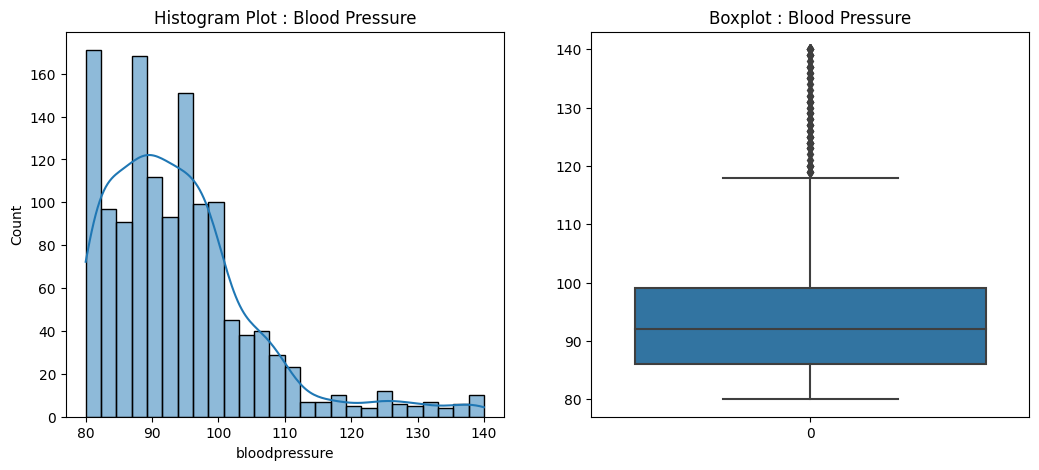


Before Removing Outliers :  1.4835342102293079 



In [15]:
plt.figure(figsize=(26,5))
plt.subplot(1,4,1)
sns.histplot((df["bloodpressure"]), kde = True)
plt.title("Histogram Plot : Blood Pressure")

plt.subplot(1,4,2)
sns.boxplot(df["bloodpressure"])
plt.title("Boxplot : Blood Pressure")
plt.show()

print("\nBefore Removing Outliers : ", df["bloodpressure"].skew(),"\n")

Total rows removed : 62 

After Removing Outliers :  0.5521760044596141 



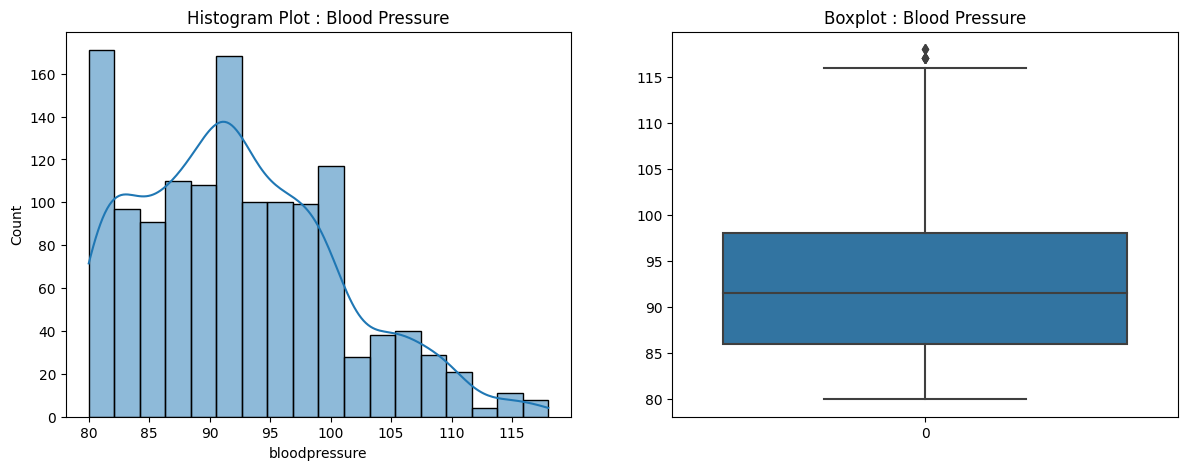

In [16]:
q3_bp = df["bloodpressure"].quantile(0.75)
q1_bp = df["bloodpressure"].quantile(0.25)
iqr_bp = q3_bp - q1_bp
upper_bp = q3_bp + (1.5*iqr_bp)
lower_bp = q1_bp - (1.5*iqr_bp)

#Replacing outliers with NAN value.
outier = 0
for i in df["bloodpressure"]:
  if i > upper_bp:
    outier+=1
    df["bloodpressure"].replace(i,np.nan, inplace = True)
print("Total rows removed :",outier,"\n")

#As the data is skewed, we will replace NAN value with Median value.
from sklearn.impute import SimpleImputer 
bp = SimpleImputer(strategy='median') 
bp_reshape = np.array(df["bloodpressure"]).reshape(-1, 1)
df["bloodpressure"] = bp.fit_transform(bp_reshape)

print("After Removing Outliers : ", df["bloodpressure"].skew(),"\n")


plt.figure(figsize=(30,5))
plt.subplot(1,4,1)
sns.histplot((df["bloodpressure"]), kde = True)
plt.title("Histogram Plot : Blood Pressure")

plt.subplot(1,4,2)
sns.boxplot(df["bloodpressure"])
plt.title("Boxplot : Blood Pressure")
plt.show()

#####Column : Claim

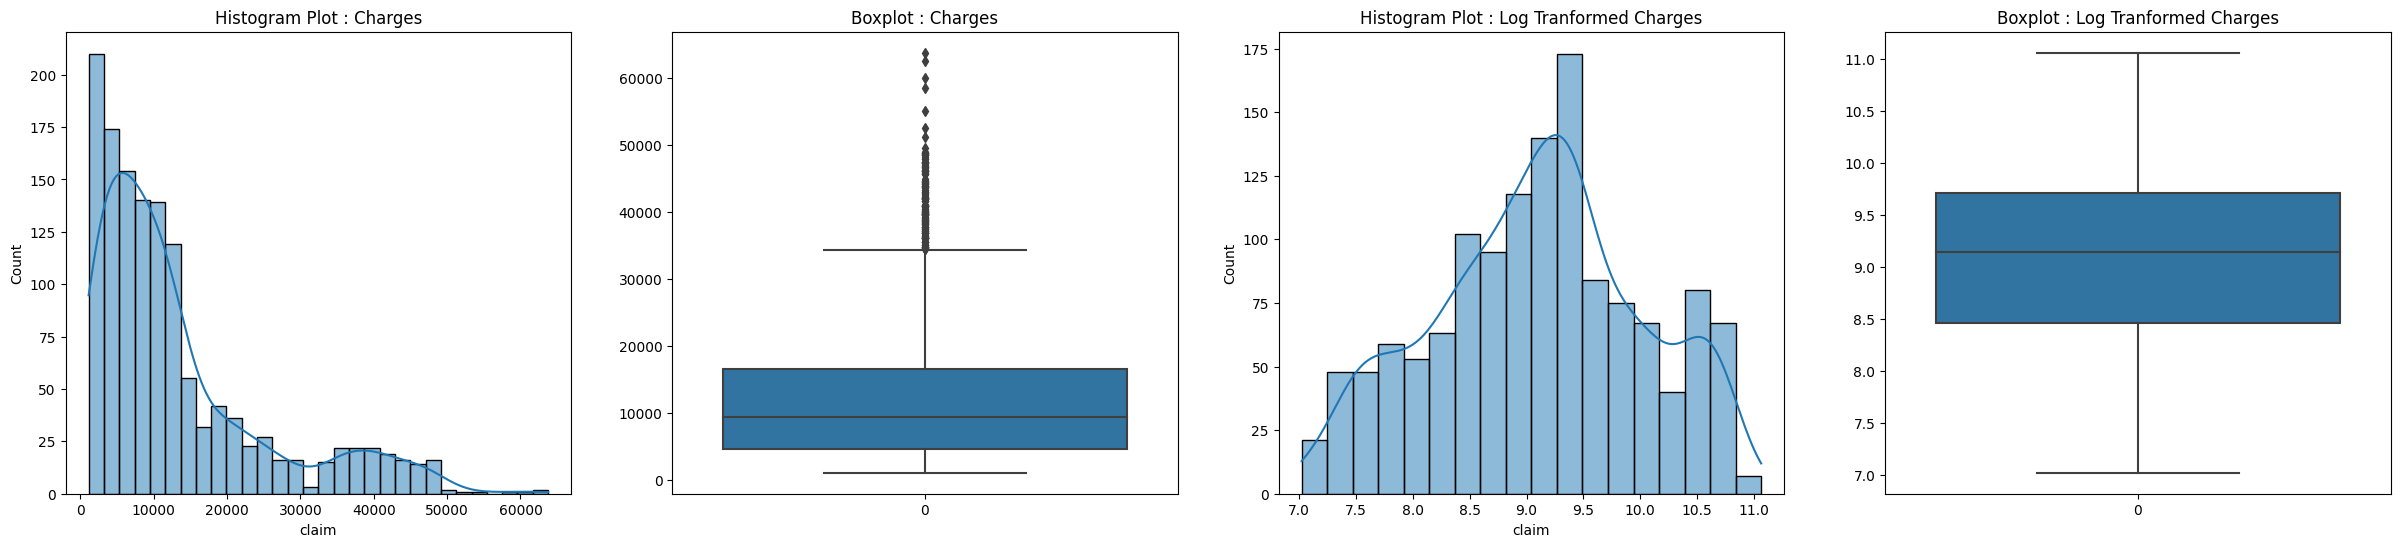


Before Transformation :  1.5167468509489237 

After Transformation :  -0.09291760558430683


In [17]:
plt.figure(figsize=(30,6))
plt.subplot(1,4,1)
sns.histplot((df["claim"]), kde = True)
plt.title("Histogram Plot : Charges")

plt.subplot(1,4,2)
sns.boxplot(df["claim"])
plt.title("Boxplot : Charges")

plt.subplot(1,4,3)
sns.histplot(np.log(df["claim"]), kde = True)
plt.title("Histogram Plot : Log Tranformed Charges")

plt.subplot(1,4,4)
sns.boxplot(np.log(df["claim"]))
plt.title("Boxplot : Log Tranformed Charges")
plt.show()

print("\nBefore Transformation : ", df["claim"].skew(),"\n")
print("After Transformation : ", np.log(df["claim"]).skew())

In [18]:
df["claim_new"] = np.log(df["claim"])

#####New Column : BMI Category

In [19]:
def bmi_categories(value):
    if pd.isna(value):
        return np.nan
    
    if value < 18.5:
        return "underweight"
    elif value >= 18.5 and value < 25:
        return "normal"
    elif value >= 25 and value <= 30:
        return "overweight"
    elif value >= 30:
        return "obesity"
    else:
        return value

# now create the categories according to the values
df["bmi_cat"] = df["bmi"].apply(lambda x: bmi_categories(x)).copy()

#**EDA**

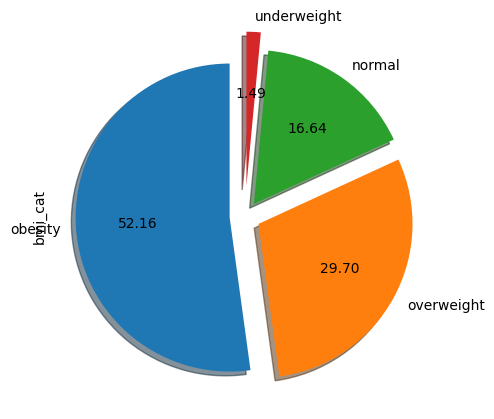

In [20]:
df["bmi_cat"].value_counts().plot.pie(startangle = 90, shadow = True, explode=(0.1, 0.1, 0.1, 0.2), figsize=(5, 5), autopct='%.2f')
plt.show()

**OBSERVATION :-**
* 52.16% people are Obese, 29.7% people are Overweight, 1.49% people are Underweight and 16.64% people are Normal.

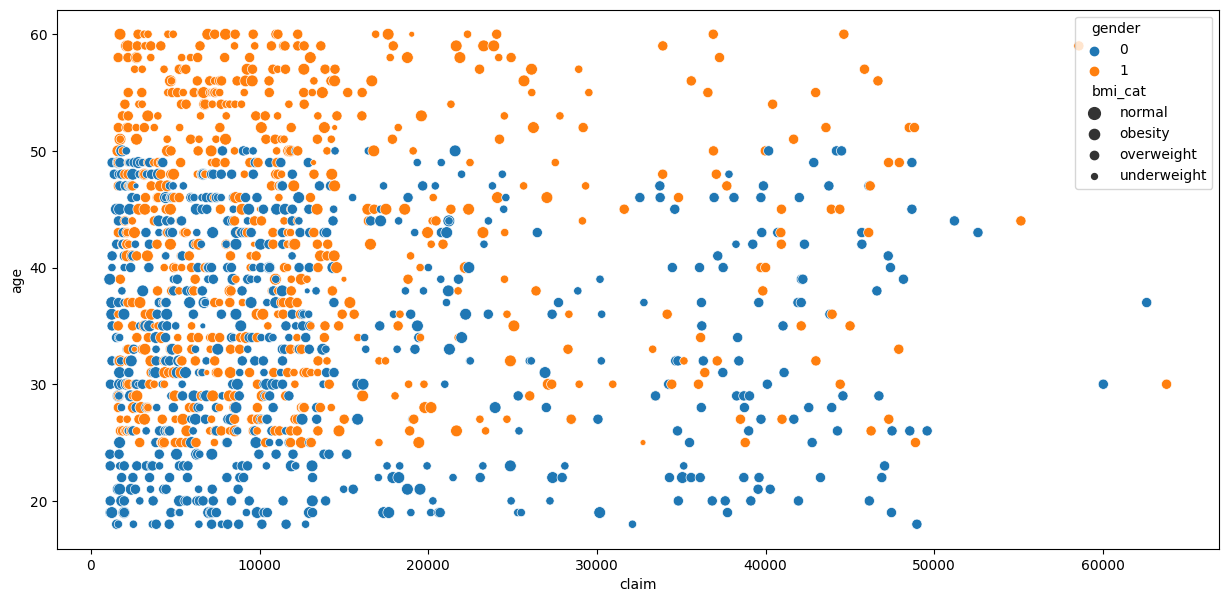

In [21]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="claim", y="age", hue="gender", size = "bmi_cat") 
plt.show()

**OBSERVATION :-**
* Claim between 0 to 15000 is more by all the Age group.
* Male claim only age between 0 to 50 whereas Female claim between 25 to 60.
* Rare people claim 45000 and above.

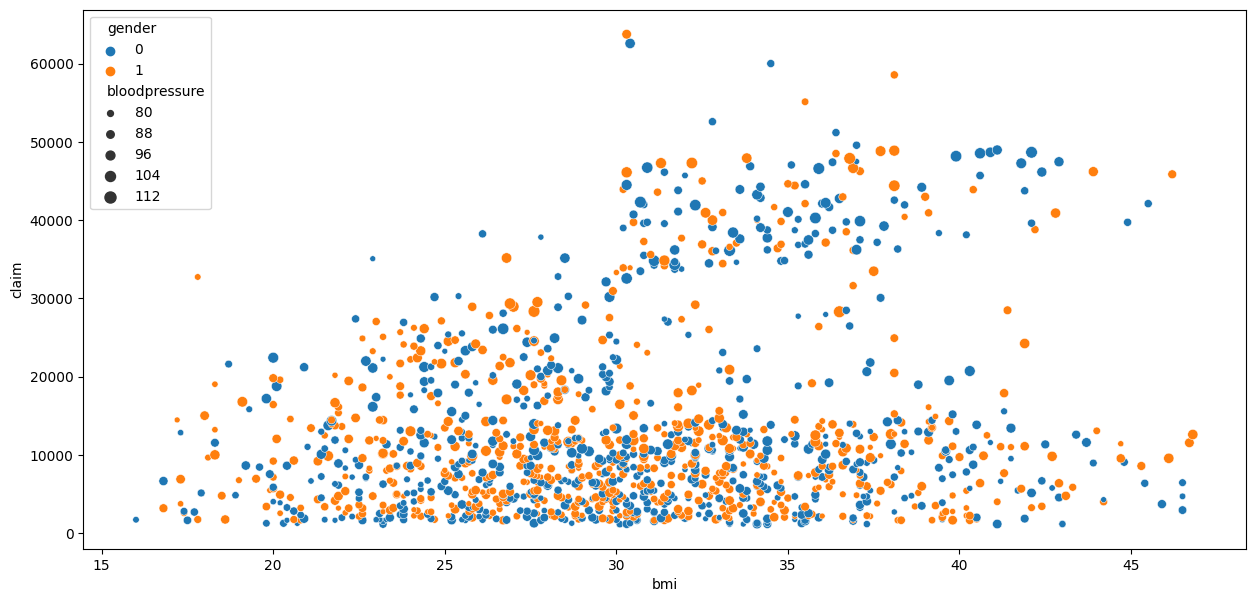

In [22]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="bmi", y="claim", hue="gender", size = "bloodpressure")
plt.show()

**OBSERVATION :-**
* Claim between 0 to 15000 is more on all range of BMI Index and Gender.

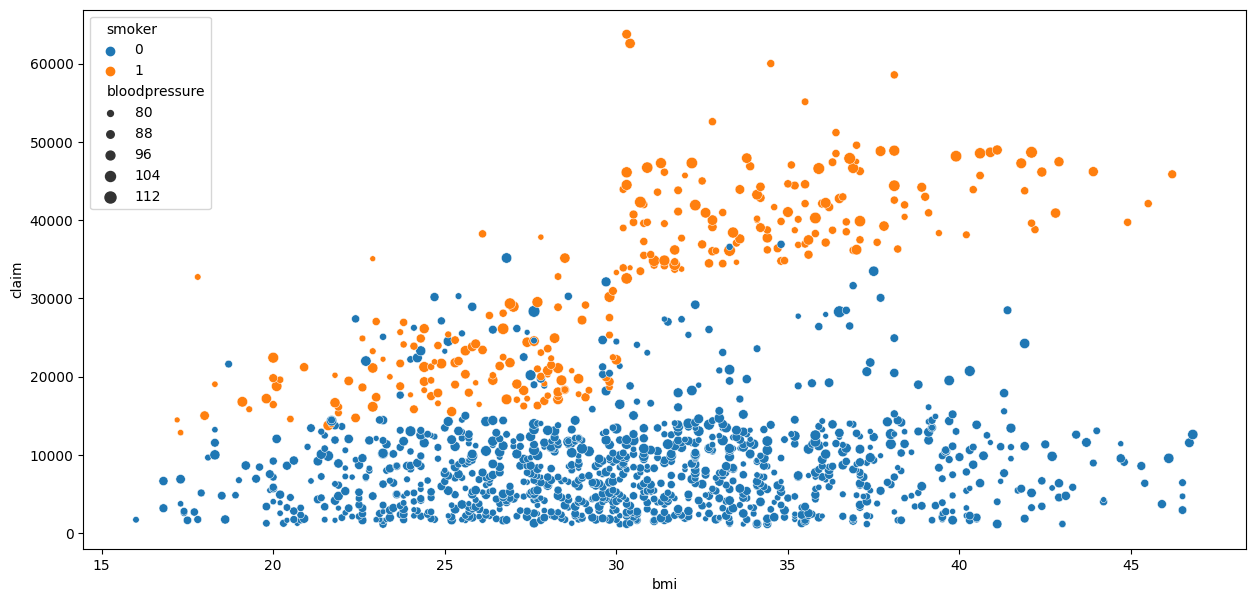

In [23]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="bmi", y="claim", hue="smoker", size = "bloodpressure")
plt.show()

**OBSERVATION :-**
* Non-Smoker claim less as compare to Smoker.
* Smoker with high blood pressure claim more as compare to Non-Smoke with high and low Blood Pressure.

In [24]:
column_eda = ["age", "bmi", "bloodpressure", "children", "claim", "bmi_cat"]

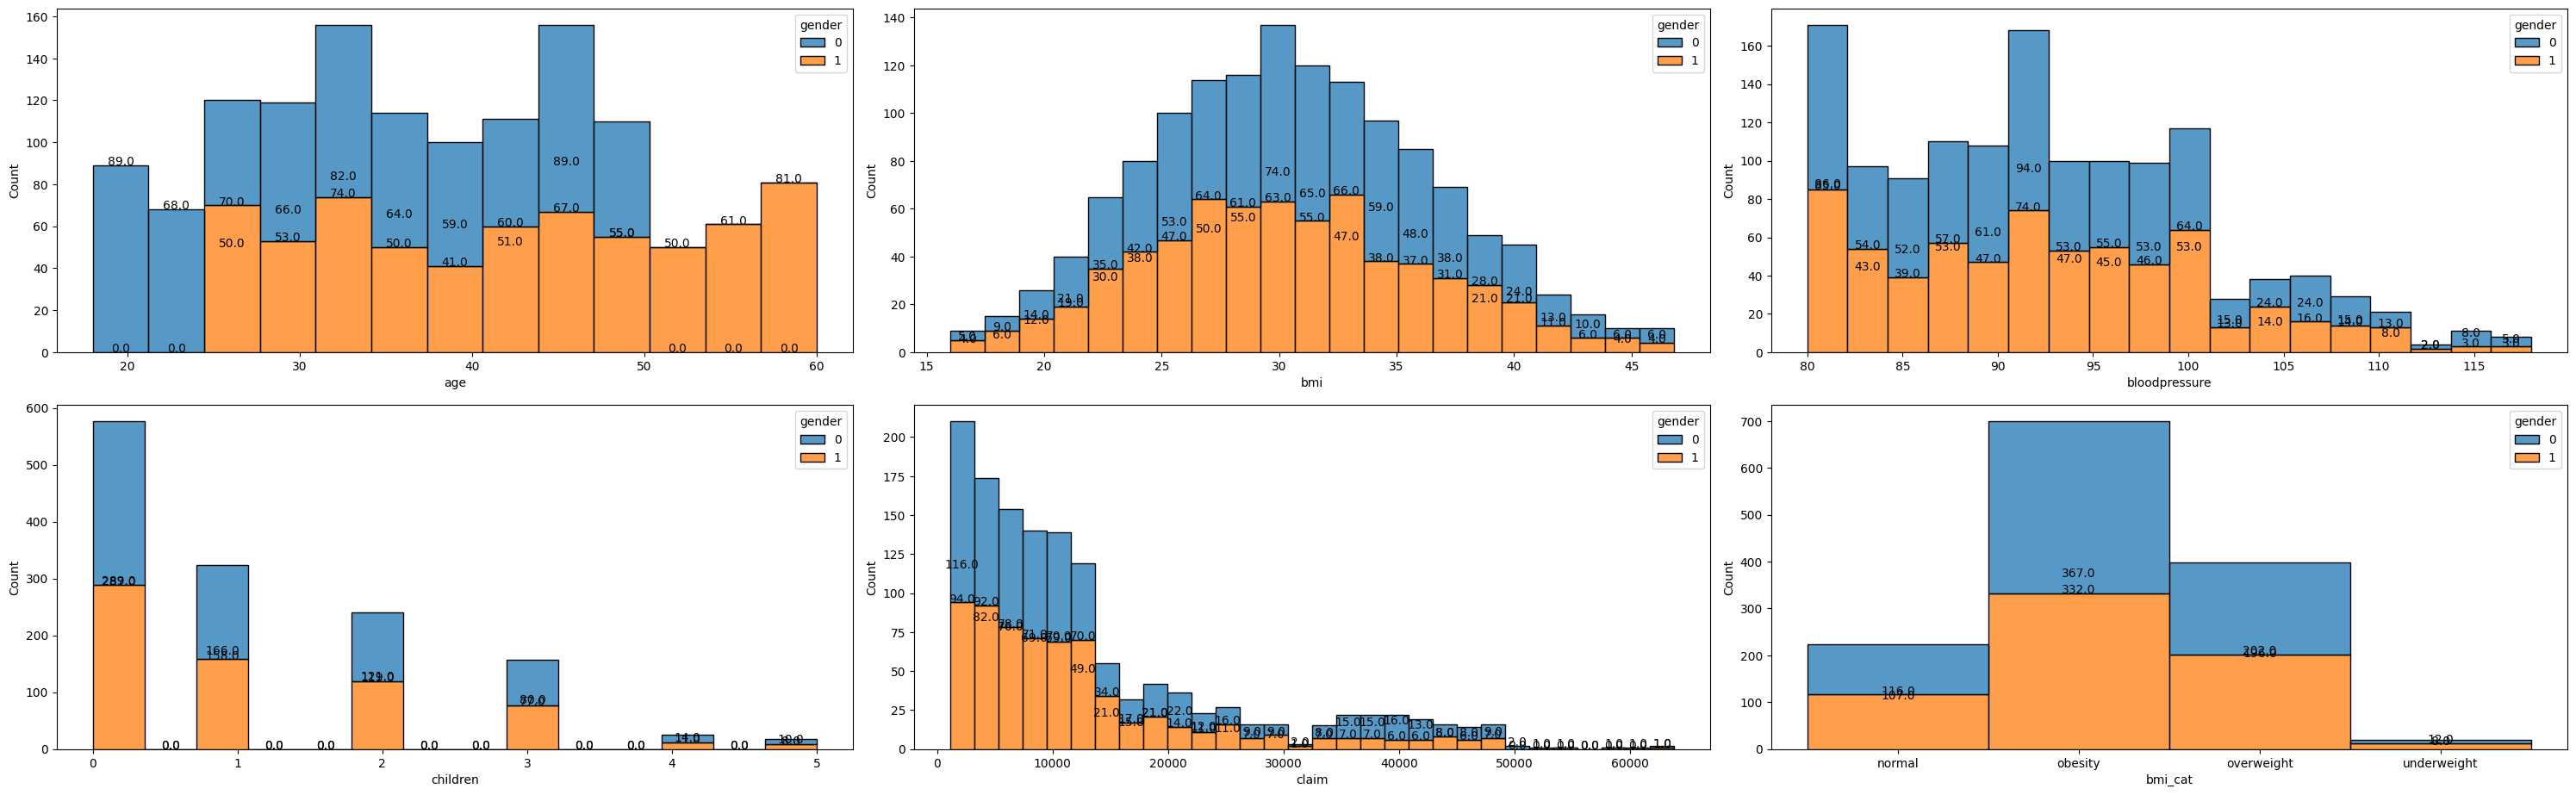

In [25]:
def numeric_based_on_gender(data):
  plt.figure(figsize = (30,230))
  l_row = 50
  l_pos = 1
  for col in column_eda:
    plt.subplot(l_row, 3, l_pos)
    ax = sns.histplot(data=df, x=col, hue="gender", multiple="stack")
    for i in ax.patches:
      percentage = '{:.1f}'.format(i.get_height())
      x = i.get_x()+ i.get_width()/2
      y = i.get_height()
      ax.annotate(percentage, (x, y), ha='center')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

numeric_based_on_gender(df)

**OBSERVATION :-**
* People who have Age between 0 to 25 are 100% dominated Male and between 50 to 60 are 100% dominated Female.
* Both gender are almost equal in BMI Category and Obese people are high.


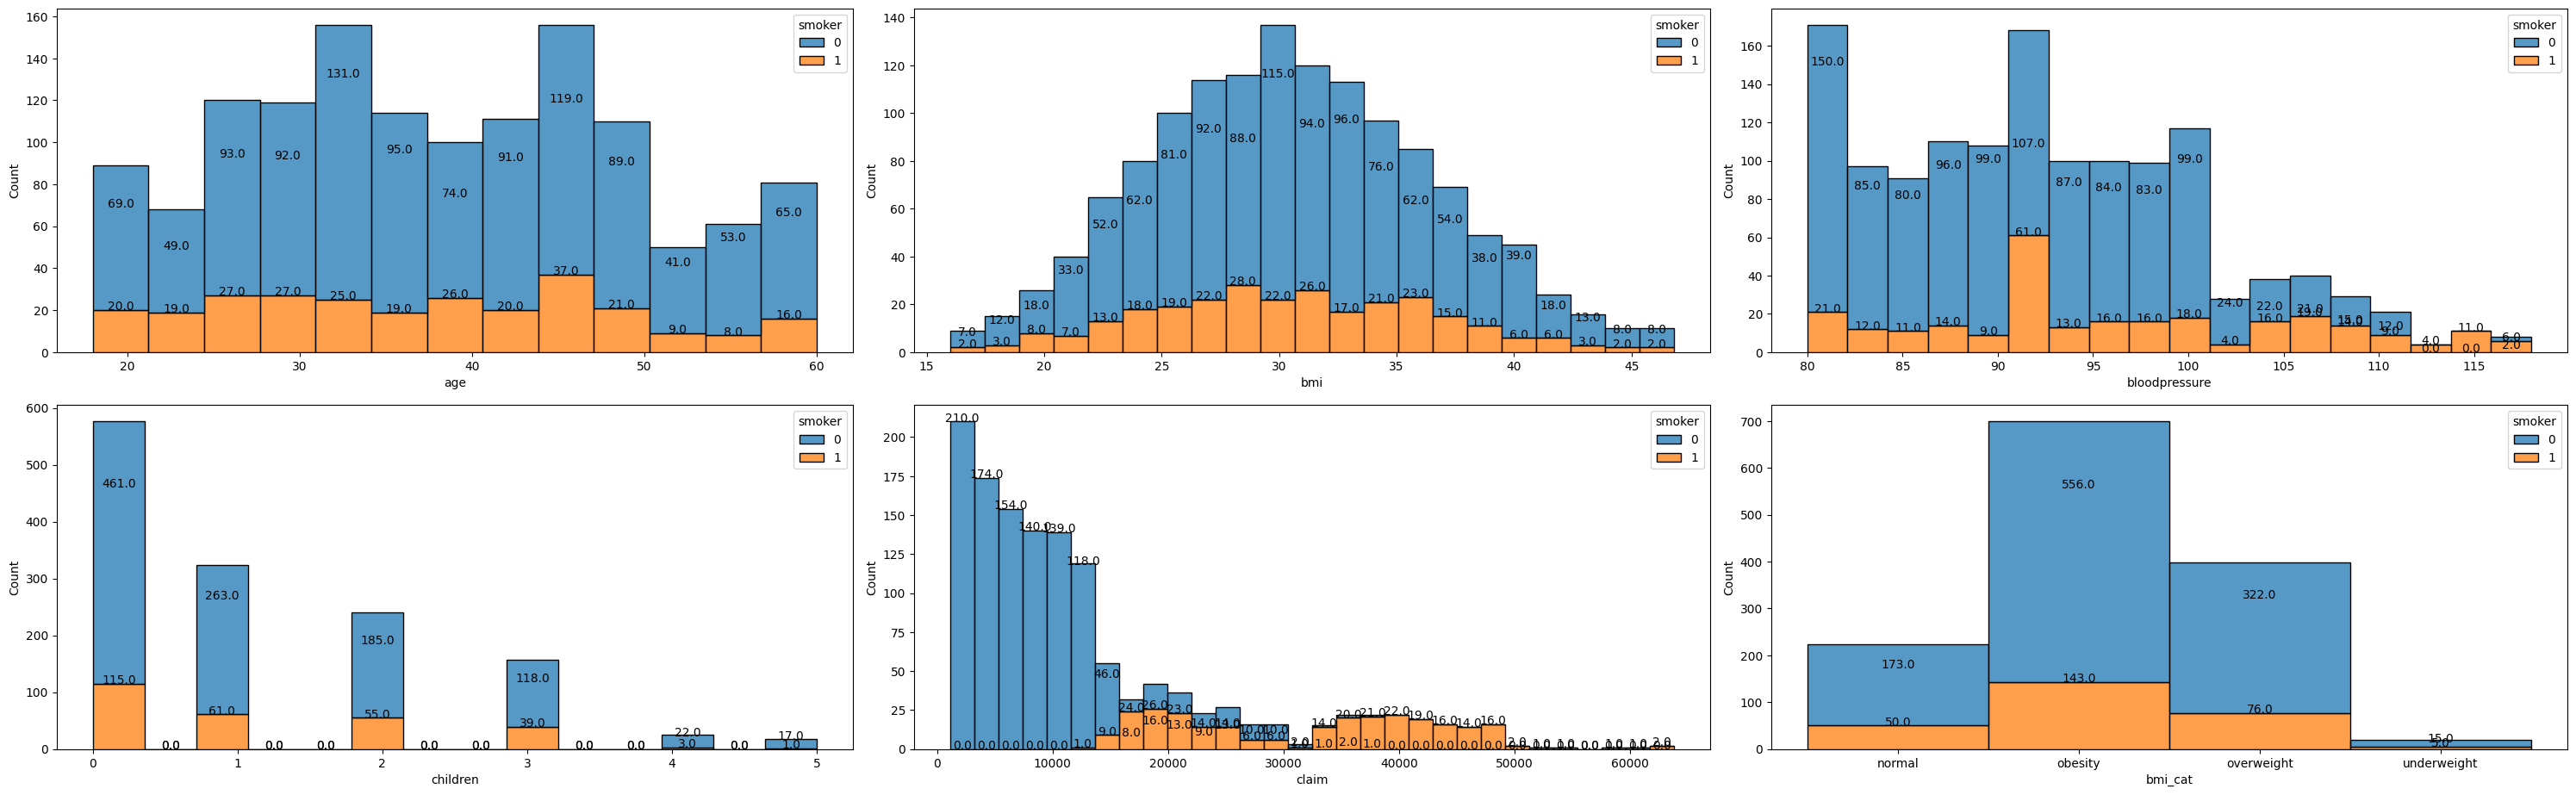

In [26]:
def numeric_based_on_smoker(data):
  plt.figure(figsize = (30,230))
  l_row = 50
  l_pos = 1
  for col in column_eda:
    plt.subplot(l_row, 3, l_pos)
    ax = sns.histplot(data=df, x=col, hue="smoker", multiple="stack")
    for i in ax.patches:
      percentage = '{:.1f}'.format(i.get_height())
      x = i.get_x()+ i.get_width()/2
      y = i.get_height()
      ax.annotate(percentage, (x, y), ha='center')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

numeric_based_on_smoker(df)

**OBSERVATION :-**
* People are high in Obese and Overweight as compare to Normal and Underweight and 556 people who are Obese are Smoker and 141 are Non-Smoker.
* People who claims insurance with total amount between 0 to above 12000 is only dominated by 981 smoker.
* People who have BMI Index and Age is dominated with Non-Smoker by 290%.
* People who claims insurance with total amount between 32000 to above 50000 is only dominated by 144 Non-Smoker.
* People who have blood pressure between 80 to 110 is dominated with Non-Smoker.

#**FEATURE SCALING**

#####Feature Splitting

In [27]:
df.dropna(inplace = True)

In [28]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,claim_new,bmi_cat
index,,,,,,,,,,,,
0,1,39.0,0,23.2,91.0,1,0,0,2.0,1121.87,7.022752,normal
1,2,24.0,0,30.1,87.0,0,0,0,2.0,1131.51,7.031308,obesity
7,8,19.0,0,41.1,100.0,0,0,0,0.0,1146.80,7.044731,obesity
8,9,20.0,0,43.0,86.0,0,0,0,0.0,1149.40,7.046995,obesity
9,10,30.0,0,30.3,97.0,0,0,0,0.0,1163.46,7.059154,obesity


In [29]:
df.drop(["PatientID", "claim_new", "bmi_cat"], axis=1, inplace = True)

In [30]:
#Dividing into Independent and Dependent Variable.
X = df.drop(["claim"], axis=1)
y = df["claim"]

In [31]:
#Splitting into training and test dataset with 75% and 25% on random state=0.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [32]:
#Getting the shape of training and test dataset.
print("Train : ",X_train.shape, y_train.shape)
print("Test : ",X_test.shape, y_test.shape)

Train :  (999, 8) (999,)
Test :  (333, 8) (333,)


In [33]:
X_train.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region
index,,,,,,,,
1141,29.0,0,32.1,85.0,0,2,0,1.0
472,31.0,1,27.3,86.0,1,1,0,2.0
1013,45.0,0,27.4,83.0,0,1,1,1.0
756,26.0,0,35.6,106.0,1,4,0,1.0
1116,42.0,0,25.6,106.0,1,2,1,3.0


#####Feature Selection

**Correlation**

In [34]:
#"Corr" use to get the relationship between all numerical variables.
## It ranges between -1 to 1.
## 0 to 1 indicates : Directly correlated with each other.
## -1 to 0 indicates : Inversly correlated with each other.
df.corr()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
age,1.000000,0.393452,-0.048359,-0.083951,-0.026246,-0.026208,-0.032211,0.011203,-0.028636
gender,0.393452,1.000000,-0.038496,0.001307,0.019277,-0.021300,-0.078666,0.031958,-0.062052
bmi,-0.048359,-0.038496,1.000000,0.078190,-0.041794,0.018457,-0.002055,0.149322,0.192285
bloodpressure,-0.083951,0.001307,0.078190,1.000000,-0.011660,-0.020115,0.237946,0.008143,0.305254
diabetic,-0.026246,0.019277,-0.041794,-0.011660,1.000000,-0.013221,0.018462,0.004437,-0.007020
children,-0.026208,-0.021300,0.018457,-0.020115,-0.013221,1.000000,0.005610,0.029452,0.064149
smoker,-0.032211,-0.078666,-0.002055,0.237946,0.018462,0.005610,1.000000,-0.000228,0.787203
region,0.011203,0.031958,0.149322,0.008143,0.004437,0.029452,-0.000228,1.000000,0.002459
claim,-0.028636,-0.062052,0.192285,0.305254,-0.007020,0.064149,0.787203,0.002459,1.000000


**Tree Regressor**

In [35]:
#Importing ExtratreeRegressor from sklearn
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [36]:
#Getting all the feature importances with target variable.
print(model.feature_importances_)
values_imp = model.feature_importances_

[0.04811071 0.01170052 0.19166133 0.06937234 0.01467919 0.02106593
 0.61968783 0.02372216]


In [37]:
X.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region
index,,,,,,,,
0,39.0,0,23.2,91.0,1,0,0,2.0
1,24.0,0,30.1,87.0,0,0,0,2.0
7,19.0,0,41.1,100.0,0,0,0,0.0
8,20.0,0,43.0,86.0,0,0,0,0.0
9,30.0,0,30.3,97.0,0,0,0,0.0


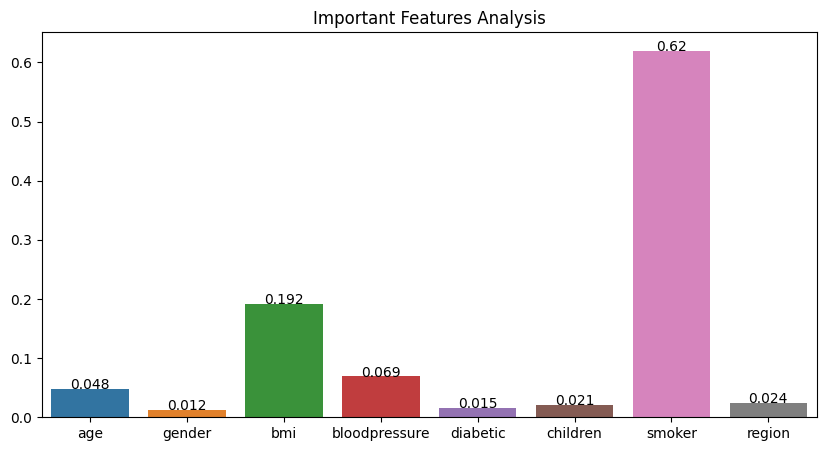

In [38]:
#plotting all the important columns which are related to target variable.
xx_col = list(X.columns)

imp_feature_val = []
for i in values_imp:
  imp_feature_val.append(round(i,3))

def feature_analysis(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = "center")

plt.figure(figsize= (10,5))
sns.barplot(x = xx_col, y = imp_feature_val)
feature_analysis(xx_col, imp_feature_val)
plt.title("Important Features Analysis")
plt.show()

**OBSERVATION :-**

* There are SIX Independent Variable from which the following are important feature w.r.t Dependent Variable:-
    * Smoker
    * Blood Pressure
    * BMI
    * Age

#####Standardization

In [39]:
#Importing Standardization from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Using fit_transform to the train data.
X_train = scaler.fit_transform(X_train)

#"transform" only to avoid data leakage.
X_test = scaler.transform(X_test)

#**MODEL BUILDING**

##**LINEAR REGRESSION**

In [40]:
#Importing Linear Regression, R2 score, MSE and MAE from sklearn.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
lr = LinearRegression()

#Fitting the training independent and dependent variable to get trained.
lr.fit(X_train, y_train)

#Predicting the result for the test dataset "X_train".
y_pred_lr_train = lr.predict(X_train)
r2_score_lr_train = r2_score(y_pred_lr_train, y_train)

#Predicting the result for the test dataset "X_test".
y_pred_lr_test = lr.predict(X_test)
r2_score_lr_test = r2_score(y_pred_lr_test, y_test)

#Getting the MAE and MSE for Linear Regression.
rmse_linear = np.sqrt(mean_squared_error(y_pred_lr_test, y_test))
mae_linear = mean_absolute_error(y_pred_lr_test, y_test)

In [41]:
print('R2_score (train) : {0:.3f}'.format(r2_score_lr_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_lr_test))
print('RMSE LR : {0:.3f}'.format(rmse_linear))
print('MAE LR : {0:.3f}'.format(mae_linear))

R2_score (train) : 0.533
R2_score (test) : 0.520
RMSE LR : 7186.362
MAE LR : 5462.119


##**RANDOM FOREST**

#####Baseline Model

In [42]:
#Importing Linear Regression, R2 score, MSE and MAE from sklearn.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

#Fitting the training independent and dependent variable to get trained.
rf.fit(X_train, y_train)

#Predicting the result for the test dataset "X_train".
y_pred_rf_train = rf.predict(X_train)
r2_score_rf_train = r2_score(y_pred_rf_train, y_train)

#Predicting the result for the test dataset "X_test".
y_pred_rf_test = rf.predict(X_test)
r2_score_rf_test = r2_score(y_pred_rf_test, y_test)

#Getting the MAE and MSE for Random Forest Regression.
rmse_rf = np.sqrt(mean_squared_error(y_pred_rf_test, y_test))
mae_rf = mean_absolute_error(y_pred_rf_test, y_test)

In [43]:
print('R2_score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE RF : {0:.3f}'.format(rmse_rf))
print('MAE RF : {0:.3f}'.format(mae_rf))

R2_score (train) : 0.965
R2_score (test) : 0.725
RMSE RF : 5664.972
MAE RF : 4028.668


#####Hypertuned Model

In [44]:
#Hyper parameter for Random Forest Regressor.
param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
                                            }

#Defining a variable "rf_new" for hypertuned Model.
rf_new = RandomForestRegressor(random_state = 42)
rf_tune = GridSearchCV(estimator = rf_new, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

#Fitting the training independent and dependent variable to get trained.
rf_tune.fit(X_train, y_train)

#Selecting the best parameter and best score for tuned model.
print("Best parameters: ", rf_tune.best_params_)
print("Best score: ", rf_tune.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best score:  0.7809060277721085


In [ ]:
#Selecting the best parameter and best score for tuned model.
print("Best parameters: ", rf_tune.best_params_)
print("Best score: ", rf_tune.best_score_)

In [45]:
#Fitting the model.
best_rf = RandomForestRegressor(**rf_tune.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

#Predicting the result for the test dataset "X_train".
y_pred_rf_tune_train = best_rf.predict(X_train)
r2_rf_tune_train = r2_score(y_pred_rf_tune_train, y_train)

#Predicting the result for the test dataset "X_test".
y_pred_rf_tune_test = best_rf.predict(X_test)
r2_rf_tune = r2_score(y_pred_rf_tune_test, y_test)

#Getting the MAE and MSE for Random Forest Regression Tuned Model.
mae_rf_tune = mean_absolute_error(y_pred_rf_tune_test, y_test)
rmse_rf_tune = np.sqrt(mean_squared_error(y_pred_rf_tune_test, y_test))

In [46]:
print("Mean Absolute Error:", mae_rf_tune)
print("Root Mean Squared Error:", rmse_rf_tune)
print('R-squared score:', r2_rf_tune)

Mean Absolute Error: 3988.479745194973
Root Mean Squared Error: 5634.09367217418
R-squared score: 0.7252964133795414


#**COMPARISION**

In [47]:
models = [
          ('Linear Regression', rmse_linear, r2_score_lr_train, r2_score_lr_test),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test),
          ('Random Forest Regression (Tuned)', rmse_rf_tune,  r2_rf_tune_train, r2_rf_tune)    
         ]

predict_table = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)'], index = None)
predict_table.style.hide_index()

Model,RMSE,R2_Score(training),R2_Score(test)
Linear Regression,7186.362297,0.533495,0.519806
Random Forest Regression,5664.971690,0.965116,0.724973
Random Forest Regression (Tuned),5634.093672,0.875828,0.725296


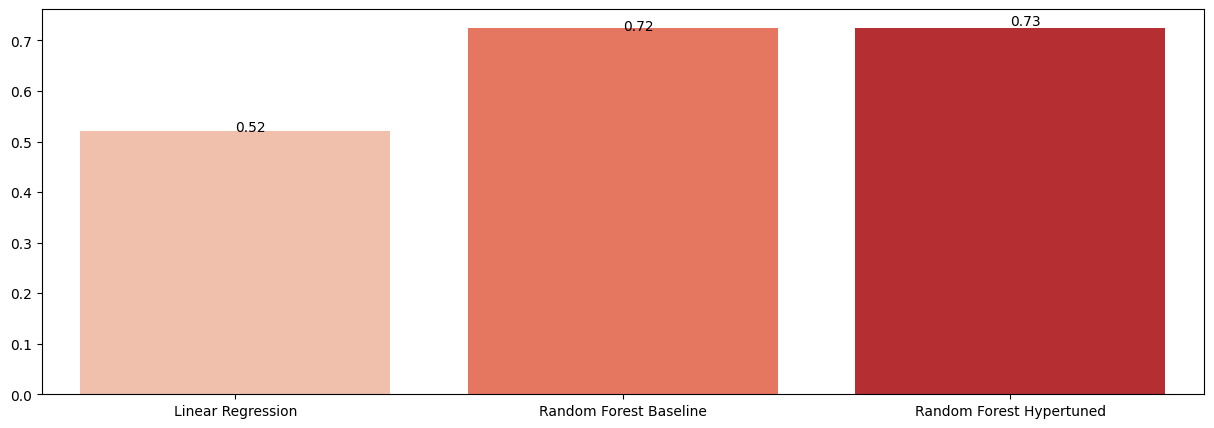

In [53]:
untuned_algo = [r2_score_lr_test, r2_score_rf_test, r2_rf_tune]
Algo_value_untune = []
for i in untuned_algo:
  Algo_value_untune.append(round(i,2))
Algo = ["Linear Regression", "Random Forest Baseline", "Random Forest Hypertuned"]
plt.figure(figsize=(15,5))
def compare_algo(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = "left")
sns.barplot(x= Algo, y = untuned_algo, palette = "Reds")
compare_algo(Algo, Algo_value_untune)

**CONCLUSION**
* The Hypertuned Random Forest Model perform better with 73% r2 Score.


#**DEPLOYEMENT**

In [51]:
import pickle

Pkl_Filename = "rf_insurance.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(best_rf, file)